<a href="https://colab.research.google.com/github/AnmolMohak/Customer_Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [434]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [435]:
customer_data=pd.read_csv("/content/Mall_Customers.csv")

In [436]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [437]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [438]:
#finding number of column and row
customer_data.shape

(200, 5)

In [439]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [440]:
#Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [441]:
customer_data['Gender']=encoder.fit_transform(customer_data['Gender'])
customer_data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)'>

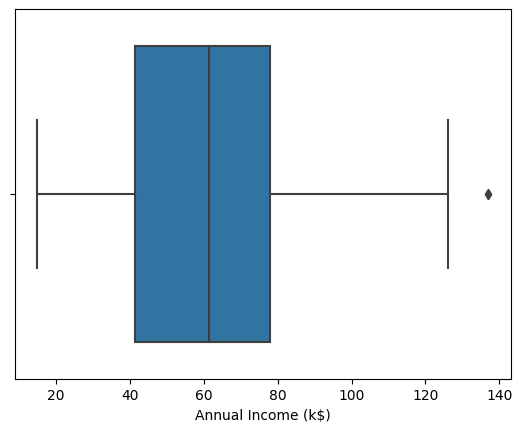

In [442]:
X=customer_data.iloc[:,[3,4]].values
#from sklearn.preprocessing import Normalizer
#scaler=Normalizer()
#X=scaler.fit_transform(X)

sns.boxplot(data=customer_data,x='Annual Income (k$)')


One outlier in annual income.

In [443]:
#choosing Number of cluster using WCSS (within Cluster Sum of Square)
# finding WCSS values for diffrent number of cluster.(1 to 10)
from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i , init='k-means++', random_state=42, max_iter=2000 )
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

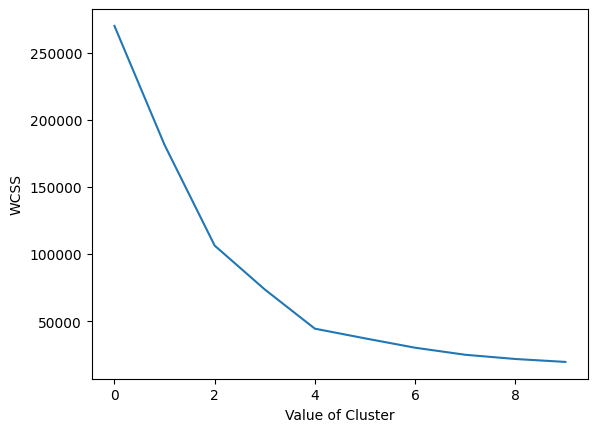

In [444]:
#plotting elbow graph
plt.plot(WCSS)
plt.xlabel('Value of Cluster')
plt.ylabel('WCSS')
plt.show()

In [445]:
# Elbow point for this graph is 5.
# Means optimum number of cluster is 5.

#Now Trainning K-Means Clustering Model

In [446]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42,)


In [447]:
#returning Label for each data point so what we can see that which value is in which cluster
Y= kmeans.fit_predict(X)
print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


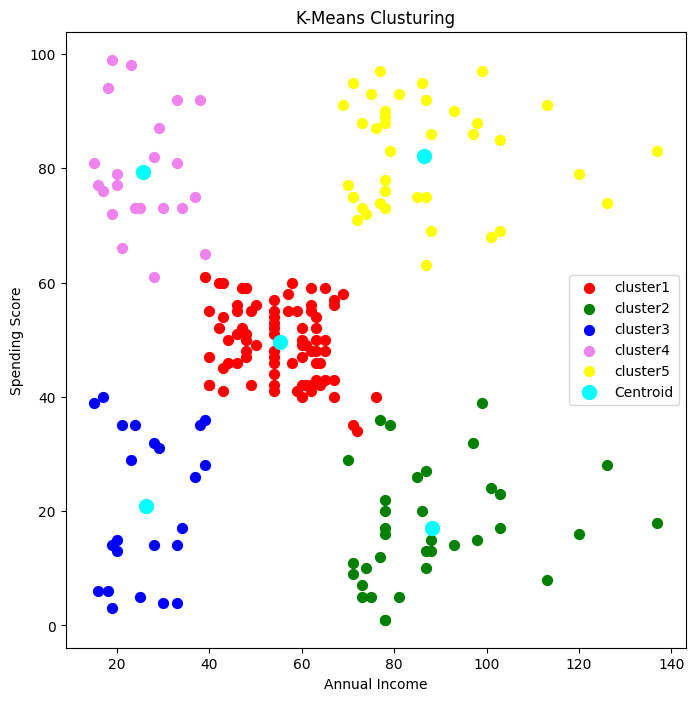

In [448]:
#Visualising all the cluster
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='red',label='cluster1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='green',label='cluster2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='blue',label='cluster3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='violet',label='cluster4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='yellow',label='cluster5')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clusturing')
# Plotting Centroid Value
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroid')
plt.legend()
plt.show()

After applying Scaler Vector/Normalize Classification is not so informative.